Use Random Forest to prepare a model on fraud data 

treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv("Fraud_check.csv")
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [2]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [3]:
df.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


In [4]:
df.shape

(600, 6)

<AxesSubplot:>

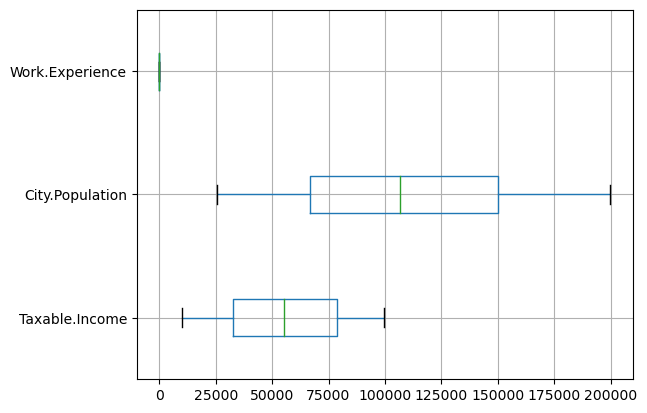

In [5]:
df.boxplot(vert=False)

In [6]:
df['Taxable.Income'] = pd.cut(x= df['Taxable.Income'],bins = [0,30000,100000], labels = ['Risky','Good'],right = False)

In [7]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,Good,39492,7,YES
596,YES,Divorced,Good,55369,2,YES
597,NO,Divorced,Good,154058,0,YES
598,YES,Married,Good,180083,17,NO


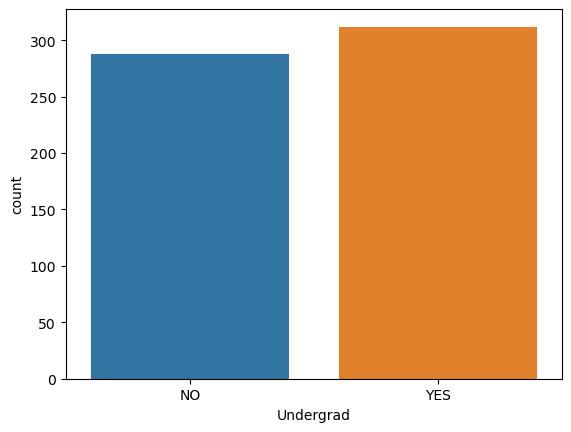

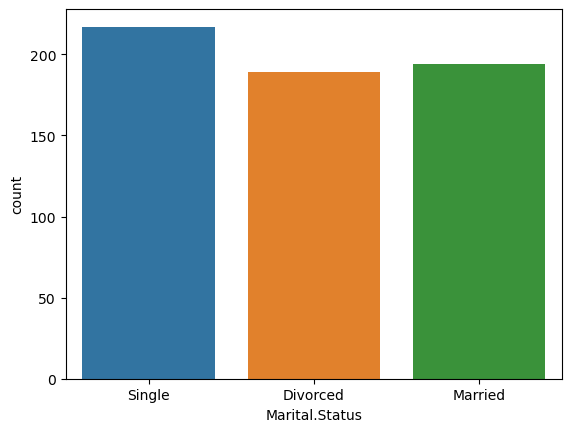

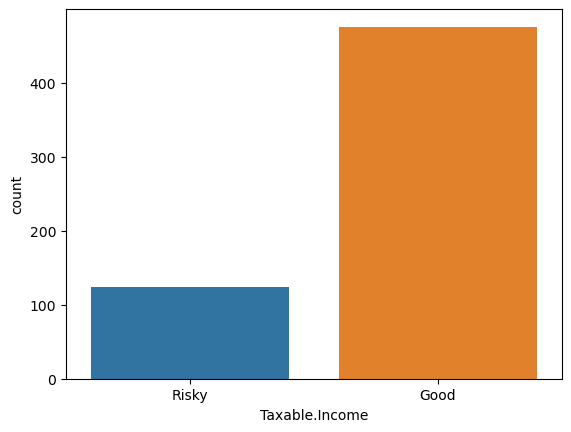

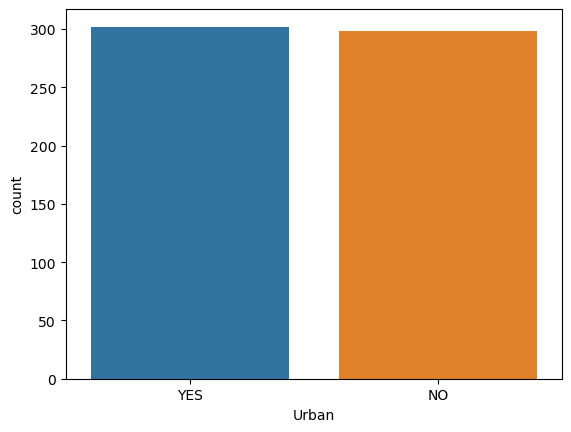

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(df['Undergrad'])
plt.show()
sns.countplot(df['Marital.Status'])
plt.show()
sns.countplot(df['Taxable.Income'])
plt.show()
sns.countplot(df['Urban'])
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for i in df.iloc[:,:3]:
    df[i]=LE.fit_transform(df[i])
df['Urban'] = LE.fit_transform(df['Urban'])
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0
...,...,...,...,...,...,...
595,1,0,0,39492,7,1
596,1,0,0,55369,2,1
597,0,0,0,154058,0,1
598,1,1,0,180083,17,0


In [10]:
y=df['Taxable.Income']
x= df.drop('Taxable.Income', axis = 1)

In [11]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [13]:
import numpy as np
astrain = []
astest = []
for i in range(1,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(x,y)
    for j in range(5,10):
        RFC = RandomForestClassifier(n_estimators = 100, max_features = j/10, max_samples = (j+1)/10)
    RFC.fit(X_train,Y_train)
    Y_pred_train = RFC.predict(X_train)
    Y_pred_test = RFC.predict(X_test)
    astrain.append(accuracy_score(Y_train,Y_pred_train))
    astest.append(accuracy_score(Y_test,Y_pred_test))
print('Accuracy score for train data : ', np.mean(astrain))
print('Accuracy score for test data : ', np.mean(astest))
print("Accuracy variance between train and test data : ",np.mean(astrain)-np.mean(astest))

Accuracy score for train data :  0.9998910021132242
Accuracy score for test data :  0.7398732065398731
Accuracy variance between train and test data :  0.26001779557335114


Random Forest
 
Assignment


About the data: 

Let’s consider a Company dataset with around 10 variables and 400 records. 

The attributes are as follows: 
- Sales -- Unit sales (in thousands) at each location
- Competitor Price -- Price charged by competitor at each location
- Income -- Community income level (in thousands of dollars)
- Advertising -- Local advertising budget for company at each location (in thousands of dollars)
- Population -- Population size in region (in thousands)
- Price -- Price company charges for car seats at each site
- Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
- Age -- Average age of the local population
- Education -- Education level at each location
- Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
- US -- A factor with levels No and Yes to indicate whether the store is in the US or not

The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis. 

In [1]:
import pandas as pd
df = pd.read_csv("Company_Data.csv")
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


<AxesSubplot:>

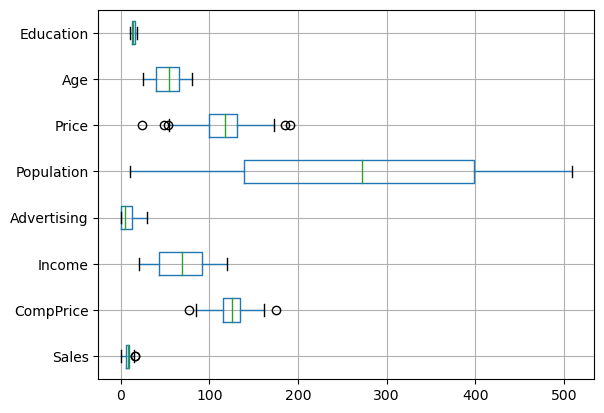

In [2]:
df.boxplot(vert = False)

As we observe from the boxplot there is outliers present in Price, CompPrice and Sales

In [3]:
df.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [4]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
df.iloc[:,0] = pd.cut(x=df.iloc[:,0], bins = [0,6,9,17], labels = ['low', 'medium', 'high'], right = False)
df.iloc[:,1] = pd.cut(x=df.iloc[:,1], bins = [77,120,140,177], labels = ['low','medium','high'], right = False)
df.iloc[:,2] = pd.cut(x=df.iloc[:,2], bins = [21,50,80,121], labels = ['low','medium', 'high'], right = False)
df.iloc[:,3] = pd.cut(x=df.iloc[:,3], bins = [0,2.5,10,30], labels = ['low','medium', 'high'], right = False)
df.iloc[:,4] = pd.cut(x=df.iloc[:,4], bins = [10,210,350,510], labels = ['low','medium', 'high'], right = False)
df.iloc[:,5] = pd.cut(x=df.iloc[:,5], bins = [21,105,120,121], labels = ['low','medium', 'high'], right = False)
df.iloc[:,7] = pd.cut(x=df.iloc[:,7], bins = [21,45,60,81], labels = ['low','medium', 'high'], right = False)
df.iloc[:,8] = pd.cut(x=df.iloc[:,8], bins = [10,13,15,19], labels = ['low','medium', 'high'], right = False)

In [6]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,high,medium,medium,high,medium,high,Bad,low,high,Yes,Yes
1,high,low,low,high,medium,low,Good,high,low,Yes,Yes
2,high,low,low,high,medium,low,Medium,medium,low,Yes,Yes
3,medium,low,high,medium,high,low,Medium,medium,medium,Yes,Yes
4,low,high,medium,medium,medium,NaN,Bad,low,medium,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,high,medium,high,high,low,NaN,Good,low,medium,Yes,Yes
396,medium,medium,low,medium,low,high,Medium,medium,low,No,Yes
397,medium,high,low,high,high,NaN,Medium,low,high,Yes,Yes
398,low,low,medium,medium,medium,low,Bad,medium,low,Yes,Yes


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

C:\Users\shiva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


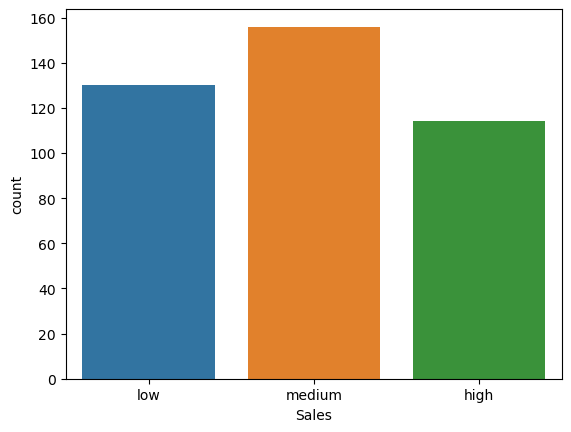

C:\Users\shiva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


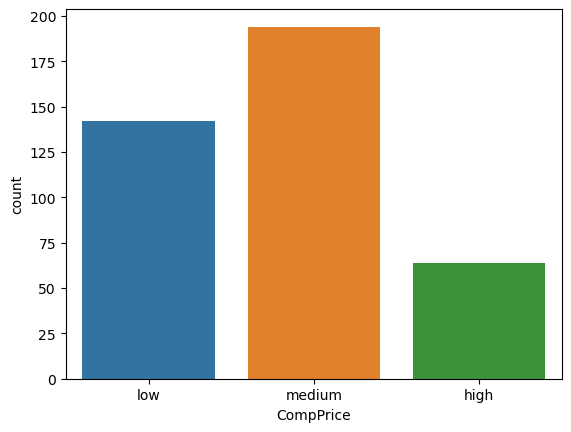

C:\Users\shiva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


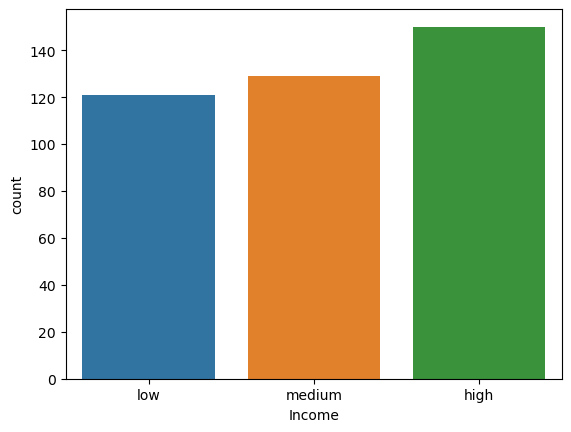

C:\Users\shiva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


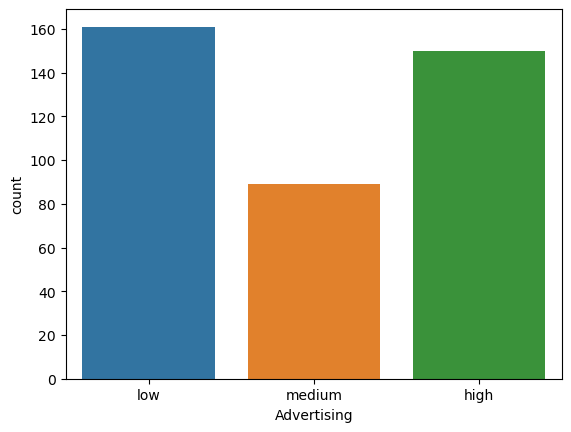

C:\Users\shiva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


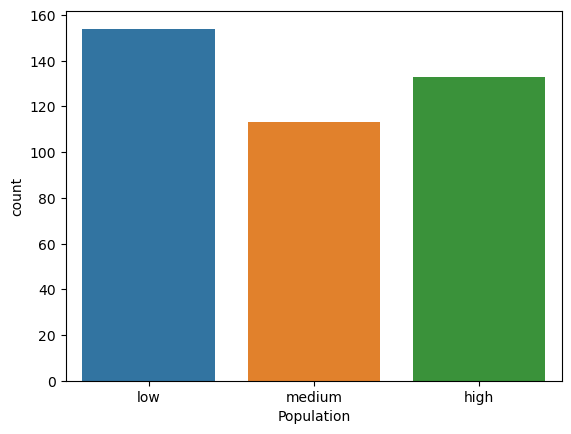

C:\Users\shiva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


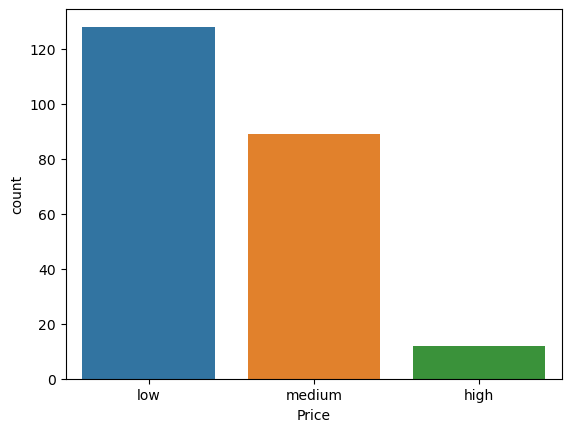

C:\Users\shiva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


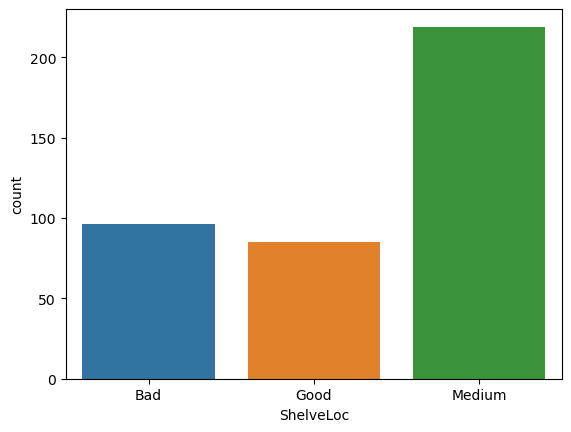

C:\Users\shiva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


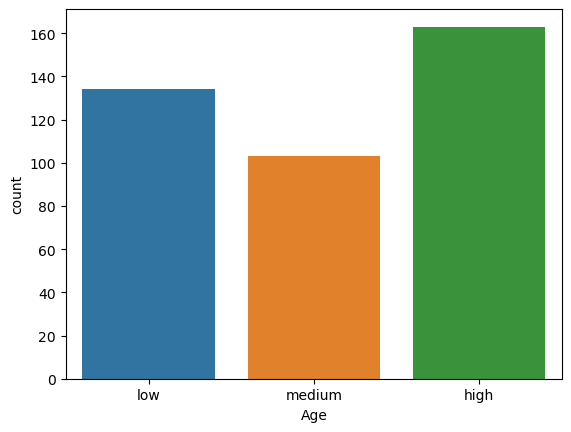

C:\Users\shiva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


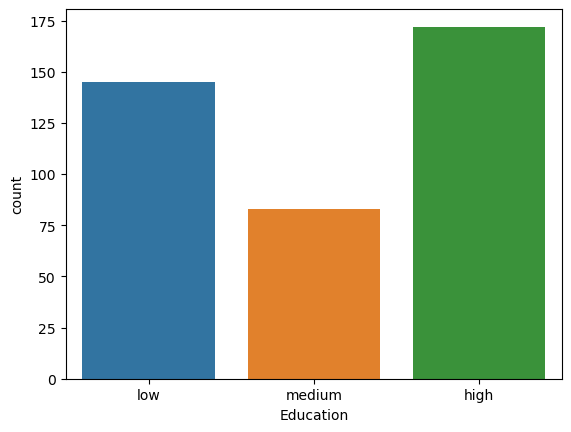

C:\Users\shiva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


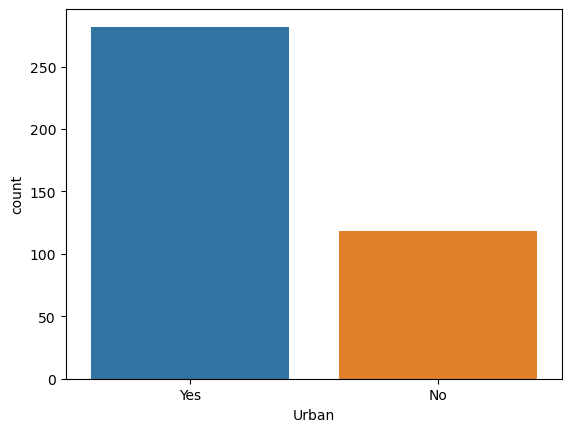

C:\Users\shiva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


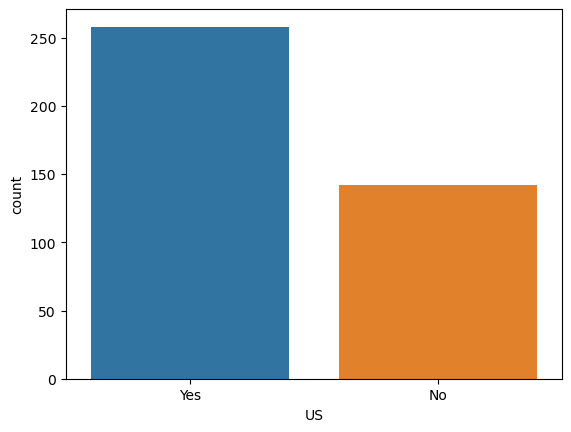

In [8]:
for i in df.iloc[:,:]:
    sns.countplot(df[i])
    plt.show()

In [9]:
for i in df.iloc[:,:]:
    df[i] = LabelEncoder().fit_transform(df[i])
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,2,2,0,2,0,0,1,0,1,1
1,0,1,1,0,2,1,1,0,1,1,1
2,0,1,1,0,2,1,2,2,1,1,1
3,2,1,0,2,0,1,2,2,2,1,1
4,1,0,2,2,2,3,0,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0,2,0,0,1,3,1,1,2,1,1
396,2,2,1,2,1,0,2,2,1,0,1
397,2,0,1,0,0,3,2,1,0,1,1
398,1,1,2,2,2,1,0,2,1,1,1


In [10]:
y=df['Sales']
x=df.drop('Sales', axis = 1)

In [11]:
import numpy as np
astrain = []
astest = []
for i in range(1,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(x,y)
    for j in range(5,10):
        RFC = RandomForestClassifier(n_estimators = 100, max_features = j/10, max_samples = (j+1)/10)
    RFC.fit(X_train,Y_train)
    Y_pred_train = RFC.predict(X_train)
    Y_pred_test = RFC.predict(X_test)
    astrain.append(accuracy_score(Y_train,Y_pred_train))
    astest.append(accuracy_score(Y_test,Y_pred_test))
print('Accuracy score for train data : ', np.mean(astrain))
print('Accuracy score for test data : ', np.mean(astest))
print("Accuracy variance between train and test data : ",np.mean(astrain)-np.mean(astest))

Accuracy score for train data :  0.9907507507507507
Accuracy score for test data :  0.5529229229229229
Accuracy variance between train and test data :  0.4378278278278278
